The *Gamma-Gamma model* is commonly used to calculate Customer Lifetime Value (CLV) for customers when we have repeat purchases. The model works on the assumption that monetary value of transactions does not vary significantly over time for an individual customer.

In [4]:
!pip install lifetimes ace_tools

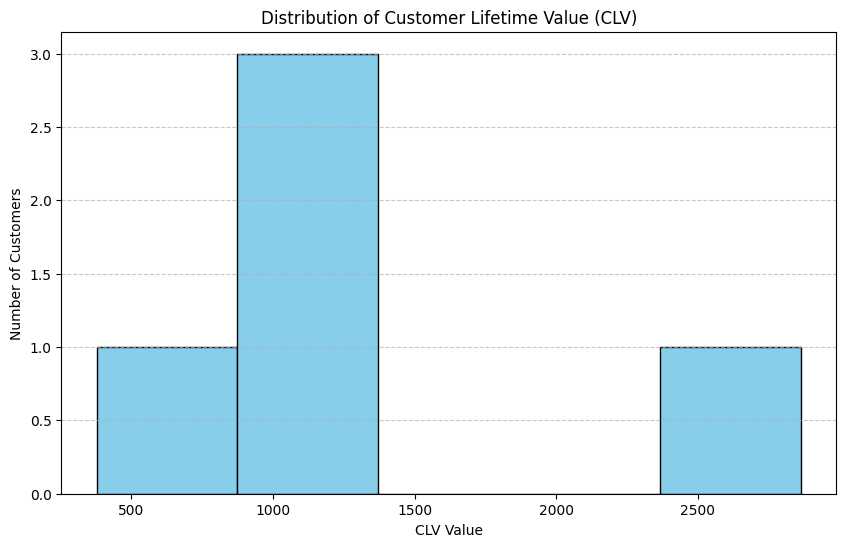

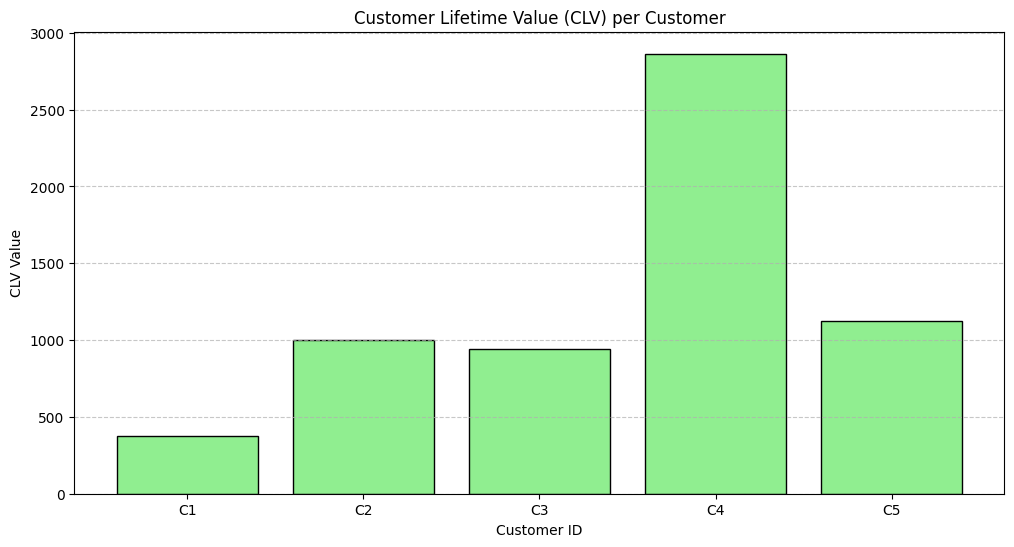

  customer_id  expected_monetary_value          clv
0          C1               127.381781   377.008090
1          C2               229.163001  1001.443219
2          C3               195.959812   943.222815
3          C4               330.210827  2864.333919
4          C5               167.923696  1122.346540


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from lifetimes import GammaGammaFitter, BetaGeoFitter

# Sample data: Customer transactions data (frequency, recency, T, monetary_value)
data = pd.DataFrame({
    'customer_id': ['C1', 'C2', 'C3', 'C4', 'C5'],
    'frequency': [3, 4, 2, 5, 1],  # Number of repeat purchases
    'recency': [10, 20, 15, 35, 5],  # Age of the customer when they made their last purchase
    'T': [30, 40, 30, 50, 10],  # Age of the customer in the observation period
    'monetary_value': [120, 220, 180, 320, 140]  # Average value of their purchases
})

# Filter out customers with zero monetary values (Gamma-Gamma model requires positive values)
data = data[data['monetary_value'] > 0]

# Step 1: Fit the BG/NBD model to predict the number of future transactions
bgf = BetaGeoFitter(penalizer_coef=0.01)
bgf.fit(data['frequency'], data['recency'], data['T'])

# Step 2: Fit the Gamma-Gamma model to predict the monetary value of transactions
ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(data['frequency'], data['monetary_value'])

# Step 3: Calculate the expected average monetary value for each customer
data['expected_monetary_value'] = ggf.conditional_expected_average_profit(data['frequency'], data['monetary_value'])

# Step 4: Calculate the Customer Lifetime Value (CLV) using the Gamma-Gamma and BG/NBD models
data['clv'] = ggf.customer_lifetime_value(
    transaction_prediction_model=bgf,  # the BG/NBD model
    frequency=data['frequency'],
    recency=data['recency'],
    T=data['T'],
    monetary_value=data['monetary_value'],
    time=12,  # predicting for the next 12 months
    discount_rate=0.01  # monthly discount rate (~12% annually)
)

# Step 5: Visualize the CLV distribution using Matplotlib

# Histogram of CLV distribution
plt.figure(figsize=(10, 6))
plt.hist(data['clv'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Lifetime Value (CLV)')
plt.xlabel('CLV Value')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Bar plot of individual Customer CLV values
plt.figure(figsize=(12, 6))
plt.bar(data['customer_id'], data['clv'], color='lightgreen', edgecolor='black')
plt.title('Customer Lifetime Value (CLV) per Customer')
plt.xlabel('Customer ID')
plt.ylabel('CLV Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display the modified dataset with expected monetary value and CLV
print(data[['customer_id', 'expected_monetary_value', 'clv']])

